In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1
Функция сигнала косинуса с частотами 50 и 150 Гц **signal()** и функция прямого преобразования Фурье **DFT_slow()**

In [2]:
amp = 1
frequency1 = 50
frequency2 = 150
omega1 = 2 * np.pi * frequency1
omega2 = 2 * np.pi * frequency2


def signal(t):
    return amp * (np.cos(t * omega1) + np.cos(t * omega2))


def dft_slow(t):
    x = np.asarray(t, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

### Задание 1(a)
- Построить дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow().
- Сравнить время вычисления двух функций

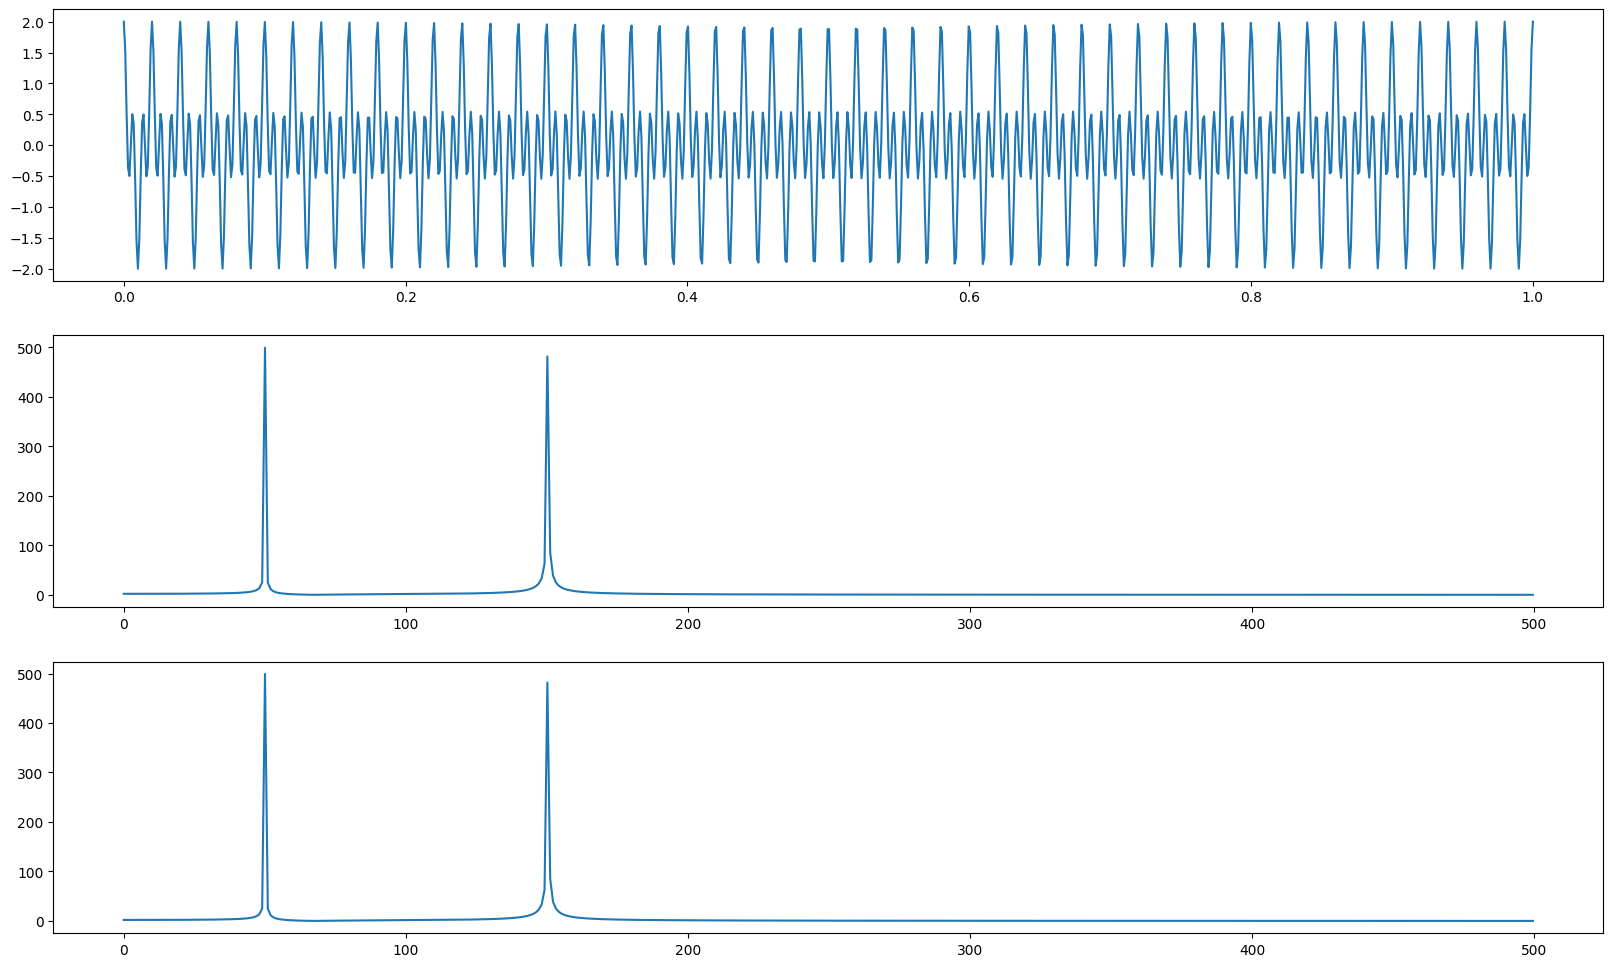

In [8]:
x = np.linspace(0, 1, 1000)
x_freq = np.linspace(0, 1000, 1000)
x_freq = x_freq[:len(x_freq)//2]
y = signal(x)

y_fft = np.fft.fft(y)
y_dft_slow = dft_slow(y)

plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
# plt.plot(x_fft, np.abs(y_app1))

plt.subplot(3, 1, 3)
plt.plot(x_freq, np.abs(y_dft_slow[:len(y_dft_slow)//2]))

plt.show()

In [4]:
%timeit np.fft.fft(y)
%timeit dft_slow(y)

30.4 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
141 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Задание 1(б)
С помощью функции быстрого обратного преобразования Фурье ifft(), убедиться, что форма сигнала не изменилась

D:\NSU\Python\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\NSU\Python\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


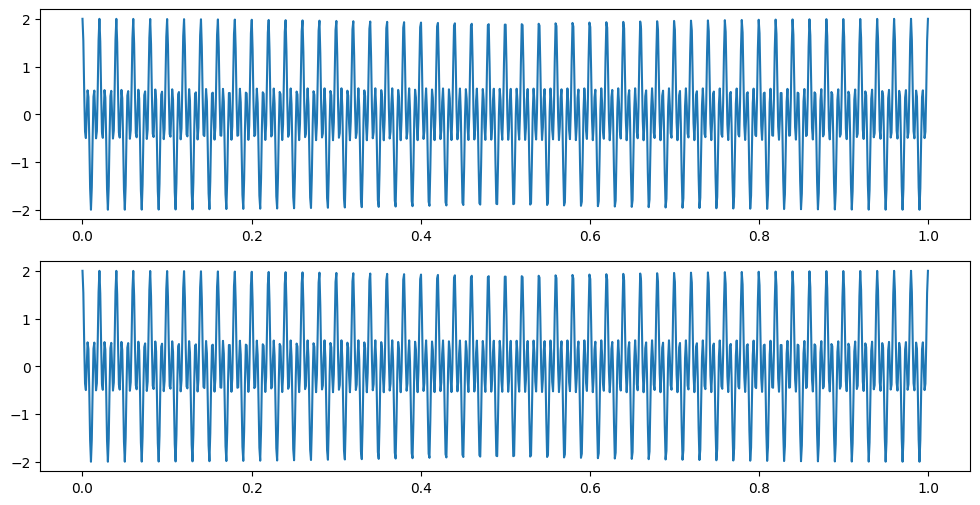

In [5]:
y_ifft_1 = np.fft.ifft(y_fft)
y_ifft_2 = np.fft.ifft(y_dft_slow)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y_ifft_1)

plt.subplot(2, 1, 2)
plt.plot(x, y_ifft_2)

plt.show()

### Задание 1(в)
- Добавить сигналу шум с помощью np.random.normal(0, 1)
- Построить дискретный спектр зашумленного сигнала
- Взять обратное преобразование Фурье от зашумленного сигнала

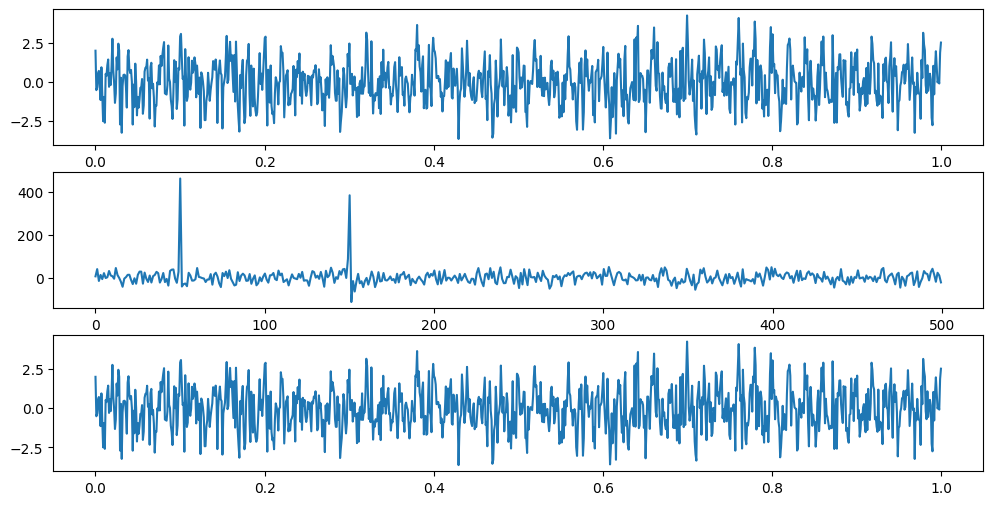

In [6]:
def signal_noised(t):
    return amp * (np.cos(t * omega1) + np.cos(t * omega2)) + np.random.normal(0, 1, t.shape)


y_noised = signal_noised(x)
y_noised_fft = np.fft.fft(y_noised)
y_noised_ifft = np.fft.ifft(y_noised_fft)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x, y_noised)

plt.subplot(3, 1, 2)
plt.plot(x_freq, y_noised_fft[:len(y_noised_fft)//2])

plt.subplot(3, 1, 3)
plt.plot(x, y_noised_ifft)

plt.show()

### Задание 2
Исследуемый сигнал **x(t)** описывается периодическими прямоугольными импульсами с амплитудой **A = 2**, периодом **T = 2** на интервале времени от 0 до 4.
- Построить дискретный спектр сигнала с помощью стандартной функции fft() и функции DFT_slow()
- Наложить шум, посмотреть спектр зашумленного сигнала

D:\NSU\Python\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\NSU\Python\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


ValueError: x and y must have same first dimension, but have shapes (1000,) and (500,)

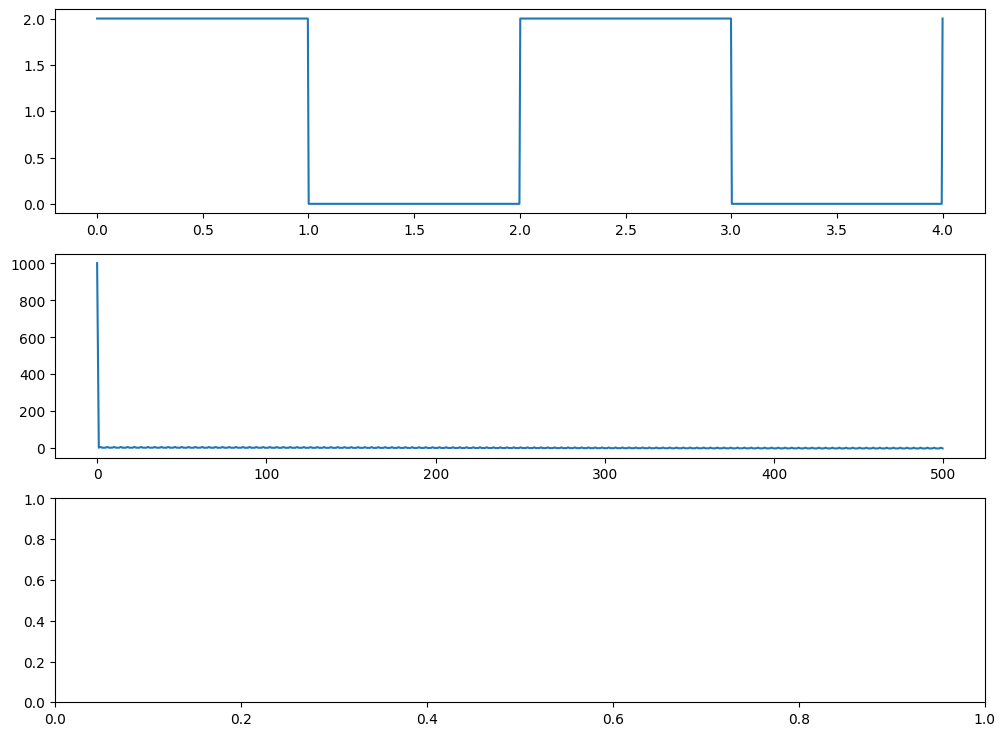

In [12]:
amplitude = 2
period = 2

x = np.linspace(0, 4, 1000)

x_freq = np.linspace(0, 1000, 1000)
x_freq = x_freq[:len(x_freq)//2]

y_rect = np.array([amplitude if t % 2 <= period / 2 else 0 for t in x])

y_rect_fft = np.fft.fft(y_rect)
y_rect_dft_slow = dft_slow(y_rect)

plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(x, y_rect)

plt.subplot(3, 1, 2)
plt.plot(x_freq, y_rect_fft[:len(y_rect_fft)//2])

plt.subplot(3, 1, 3)
plt.plot(x, y_rect_dft_slow[:len(y_rect_dft_slow)//2])

plt.show()

### Задание 3
Реализовать код для определения быстрого дискретного преобразования Фурье.
Убедиться, что функция написана верно, для этого рассмотреть сигнал косинуса с частотой 50 Гц и убедиться, что сигнал имеет одну выделенную частоту 50 Гц.
Сравнить время выполнения написанного кода для реализации БДПФ с встроенной функцией БДПФ fft()